In [1]:
# Loading data and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("../data/raw/train.csv", index_col='id')
test_data = pd.read_csv("../data/raw/test.csv")

train_data.head(5)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [3]:
# Our train data has no null data points
# Getting our X and y data
y = train_data['diagnosed_diabetes']
X = train_data.drop(columns='diagnosed_diabetes')
#Getting numerical and categorical columns

cat_cols = [col for col in X.columns if(X[col].dtype == 'object')]

num_cols = [col for col in X.columns if(X[col].dtype == 'int64' or X[col].dtype == 'float64')]
print(cat_cols)
print(num_cols)

['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']


In [5]:
# Checking our data in test.csv

test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  heart_rate                

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,849999.500000,50.432397,2.089693,92.349087,5.945838,6.997795,6.011278,25.881906,0.859007,116.374117,75.396013,70.048350,187.308620,53.813557,103.416083,123.538480,0.152920,0.184410,0.033110
std,86602.684716,11.938741,1.066214,62.187399,1.481068,0.914693,2.060472,2.894289,0.038523,11.252146,6.950340,7.090543,18.413053,8.398126,20.571855,28.965441,0.359911,0.387819,0.178924
min,700000.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.690000,91.000000,51.000000,42.000000,107.000000,22.000000,51.000000,31.000000,0.000000,0.000000,0.000000
25%,774999.750000,42.000000,1.000000,51.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,174.000000,48.000000,89.000000,104.000000,0.000000,0.000000,0.000000
50%,849999.500000,50.000000,2.000000,77.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000
75%,924999.250000,59.000000,3.000000,115.000000,7.000000,7.600000,7.400000,27.800000,0.890000,124.000000,80.000000,75.000000,200.000000,60.000000,117.000000,142.000000,0.000000,0.000000,0.000000
max,999999.000000,89.000000,9.000000,748.000000,9.900000,9.900000,15.900000,38.300000,1.050000,170.000000,104.000000,101.000000,285.000000,91.000000,226.000000,290.000000,1.000000,1.000000,1.000000


In [ ]:
binary_cols = [col for col in X.columns if X[col].nunique()  <= 3]
print(binary_cols)

# Getting variance of the data in binary columns and those having very low cardinality
for col in binary_cols:
    total = X[col].count()
    perc_count = X[col].value_counts() / total * 100
    print(perc_count, '\n')

['gender', 'smoking_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
gender
Female    51.891000
Male      47.583571
Other      0.525429
Name: count, dtype: float64 

smoking_status
Never      70.635429
Current    14.766143
Former     14.598429
Name: count, dtype: float64 

family_history_diabetes
0    85.059857
1    14.940143
Name: count, dtype: float64 

hypertension_history
0    81.801
1    18.199
Name: count, dtype: float64 

cardiovascular_history
0    96.967571
1     3.032429
Name: count, dtype: float64 



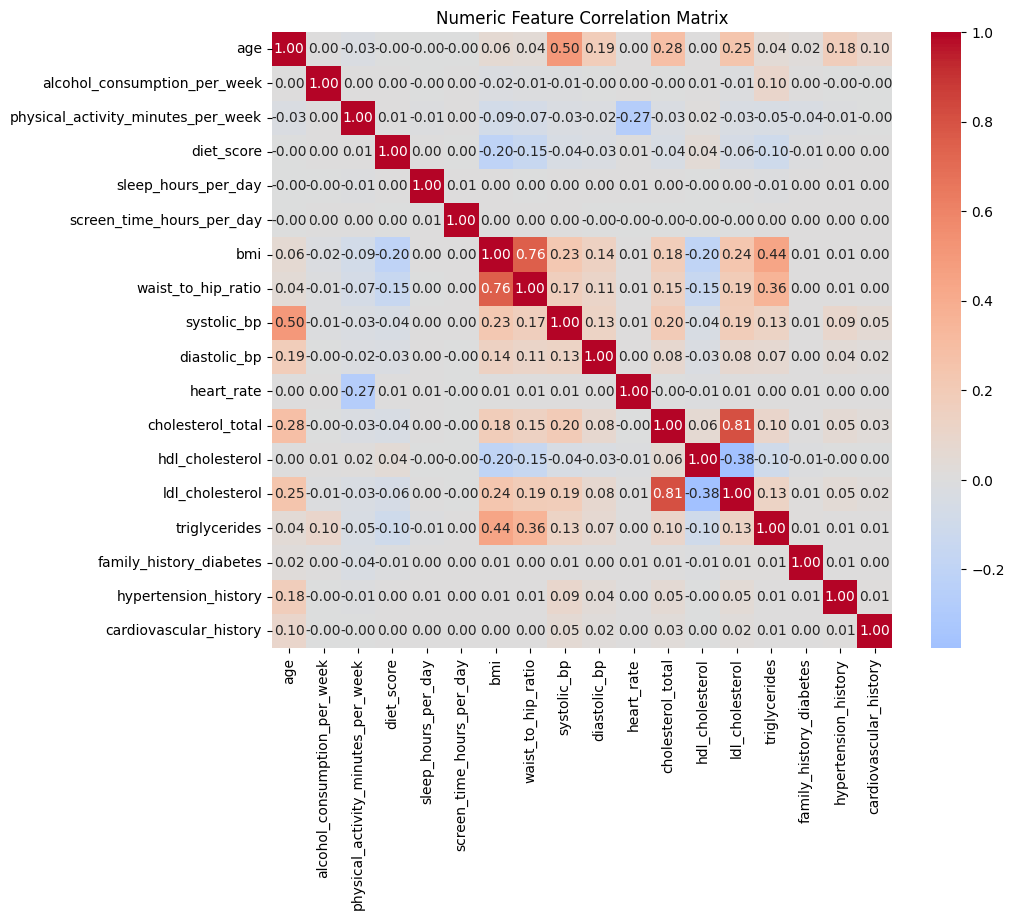

In [23]:
# Checking Multi colinearity between the features
multi_col_matrix = X[num_cols].corr()

# Plotting the data for better understanding 
plt.figure(figsize=(10, 8))
sns.heatmap(multi_col_matrix, cmap="coolwarm", center=0, annot = True, fmt = '.2f')
plt.title("Numeric Feature Correlation Matrix")
plt.show()

In [25]:
# Lets do cardinality analysis of the categorical columns
for col in cat_cols:
    total_unique = X[col].nunique()
    count = X[col].value_counts()

    print("\n Total number of unique values: ", total_unique)
    print("\n Value count of each unique: ", count)


 Total number of unique values:  3

 Value count of each unique:  gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64

 Total number of unique values:  5

 Value count of each unique:  ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64

 Total number of unique values:  4

 Value count of each unique:  education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64

 Total number of unique values:  5

 Value count of each unique:  income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64

 Total number of unique values:  3

 Value count of each unique:  smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64

 Total number of unique values:  4

 Value count of each unique:  